# LEAD SCORING CASE STUDY

OBJECTIVE:
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing and Merging Data

In [674]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [589]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [675]:
# Importing dataset
lead = pd.read_csv("C:\\Users\\praga\\OneDrive\\Desktop\\logistic regression\\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [494]:
# Let's check the dimensions of the dataf
lead.shape

(9240, 37)

In [495]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [496]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [497]:
#checking null values in each rows

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [498]:
lead.shape

(9240, 37)

In [499]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


DELETING UNIQUE VARIABLES AND REPLACING 'SELECT' BY NULL.

In [500]:
#dropping Lead Number and Prospect ID since they have all unique values

lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [501]:
#Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)

In [502]:
#checking null values in each rows

lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [503]:
#checking percentage of null values in each column

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [504]:
#dropping cols with more than 45% missing values

cols=lead.columns

for i in cols:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 45):
        lead.drop(i, 1, inplace = True)

In [505]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [506]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# Categorical variable having high percentge of null values

In [507]:
##FIRST VARIABLE : COUNTRY

#checking value counts of Country column

lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [508]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

lead['Country'] = lead['Country'].replace(np.nan,'India')

In [509]:
lead['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [510]:
##Since India is the pnly biggest country we are dropping the col.

In [511]:
#creating a list of columns to be droppped

cols_to_drop=['Country']


In [512]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [513]:

#checking value counts of "City" column

lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [514]:
#replacing null values with mumbai

lead['City'] = lead['City'].replace(np.nan,'Mumbai')

In [515]:

lead['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [516]:
## 3RD VARIABLE : Specialization

#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [517]:
##converting null values by 'not specified'

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Not Specified')

In [518]:
#combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [519]:

lead['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [520]:
#4TH VARIABLE : What is your current occupation

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [521]:
#imputing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [522]:
#checking count of values
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [523]:
#5TH VARIABLE : What matters most to you in choosing a course

#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [524]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [525]:
#checking value counts of variable
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [526]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [527]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [528]:
#6th VARIABLE : TAGS

#checking value counts of Tag variable
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [529]:
#replacing Nan values with "Not Specified"
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')

In [530]:
#replacing tags with low frequency with "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [531]:

#checking value counts of Tag variable
lead['Tags'].value_counts(dropna=False)

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [532]:
##2ND TIME CHECKING THE PERCENTAGE OF MISSING VALUES

In [533]:
#checking percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [535]:
#7TH VARIABLE : Lead Source

In [536]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [537]:
#replacing Nan Values and combining low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

# Result for Lead Source Variable
Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [538]:
# VARIABLE 8 : Last Activity

lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [539]:
#replacing Nan Values and combining low frequency values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [540]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [541]:
#Check the Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [542]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead = lead.dropna()

In [544]:
#Checking percentage of Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [545]:
#VARIABLE 9: Lead Origin
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [546]:
#VARIABLE 10: LAST NOTABLE ACTIVITY

#checking value counts of last Notable Activity
lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [547]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [548]:
#list of columns to be dropped
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [549]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Do Not Call','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [550]:
#dropping columns
lead = lead.drop(cols_to_drop,1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

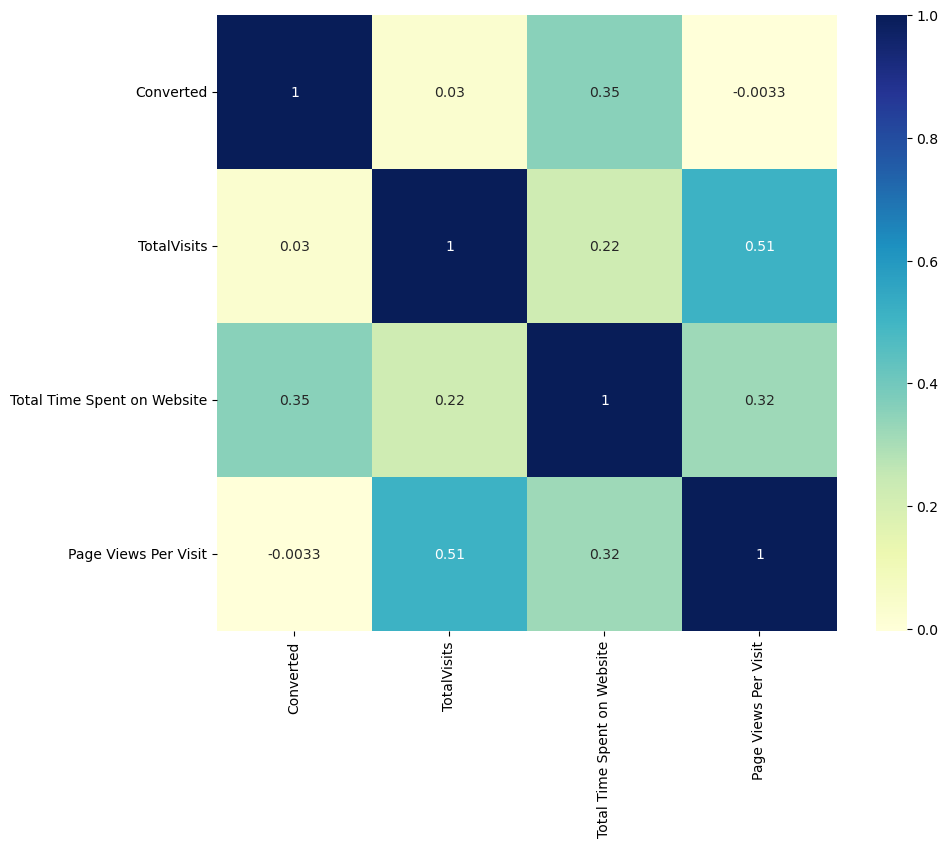

In [551]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [552]:
#getting a list of categorical columns

cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [553]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [554]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [555]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([lead,dummy],1)

In [556]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [557]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [558]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [559]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [560]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead = pd.concat([lead, dummy], axis = 1)

In [561]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,1


In [562]:
#dropping the original columns after dummy variable creation

lead.drop(cat_cols,1,inplace = True)

In [563]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [564]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead['Converted']

y.head()

X=lead.drop('Converted', axis=1)

In [565]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [566]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6372 non-null   float64
 1   Total Time Spent on Website                       6372 non-null   int64  
 2   Page Views Per Visit                              6372 non-null   float64
 3   Specialization_Banking, Investment And Insurance  6372 non-null   uint8  
 4   Specialization_Business Administration            6372 non-null   uint8  
 5   Specialization_E-Business                         6372 non-null   uint8  
 6   Specialization_E-COMMERCE                         6372 non-null   uint8  
 7   Specialization_International Business             6372 non-null   uint8  
 8   Specialization_Management_Specializations         6372 non-null   uint8  
 9   Specialization_M

# SCALING OF DATA

In [567]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7962,-0.092900,1.476324,-0.394072,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5520,0.695064,-0.771066,2.111481,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1962,0.301082,-0.571257,0.061483,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1566,2.074000,1.393834,0.517039,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9170,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# MODEL BUILDING USING STATS

In [585]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [591]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [594]:
from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [593]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [595]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [596]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
     

In [597]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.6
Date:                Sat, 17 Feb 2024   Deviance:                       2517.2
Time:                        23:47:21   Pearson chi2:                 8.41e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3478      0.120     -2.907      0.004      -0.582      -0.113
Total Time Spent on Website                       1.0800      0.061     17.833      0.000       0.961       1.199
Lead Source_Direct Traffic                       -1.5331      0.168     -9.143      0.000      -1.862      -1.204
Lead Source_Google                               -1.1512      0.154     -7.489      0.000      -1.452      -0.850
Lead Source_Organic Search                       -1.1697      0.192     -6.078      0.000      -1.547      -0.792
Lead Source_Referral Sites                       -1.3834      0.512     -2.704      0.007      -2.386      -0.381
Lead Source_Welingak Website                      4.2331      0.738      5.738      0.000       2.787       5.679
Last Activity_SMS Sent                            1.9452      0.114     16.991      0.000       1.721       2.170
Last Notable Activity_Modified                   -1.7141      0.126    -13.559      0.000      -1.962      -1.466
Last Notable Activity_Olark Chat Conversation    -1.7256      0.405     -4.256      0.000      -2.520      -0.931
Tags_Closed by Horizzon                           6.9252      0.724      9.563      0.000       5.506       8.345
Tags_Interested in other courses                 -1.9879      0.376     -5.284      0.000      -2.725      -1.251
Tags_Lost to EINS                                 6.4201      0.731      8.786      0.000       4.988       7.852
Tags_Other_Tags                                  -2.3801      0.213    -11.165      0.000      -2.798      -1.962
Tags_Ringing                                     -3.4425      0.246    -13.968      0.000      -3.926      -2.959
Tags_Will revert after reading the email          4.6529      0.188     24.689      0.000       4.284       5.022
=================================================================================================================
"""

In [ ]:
###p-value of variable Lead Source_Referral Sites is high, so we can drop it.

In [598]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [599]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.0
Date:                Sat, 17 Feb 2024   Deviance:                       2526.0
Time:                        23:49:53   Pearson chi2:                 8.36e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6060
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4354      0.116     -3.743      0.000      -0.663      -0.207
Total Time Spent on Website                       1.0605      0.060     17.665      0.000       0.943       1.178
Lead Source_Direct Traffic                       -1.4424      0.165     -8.762      0.000      -1.765      -1.120
Lead Source_Google                               -1.0580      0.150     -7.038      0.000      -1.353      -0.763
Lead Source_Organic Search                       -1.0774      0.190     -5.680      0.000      -1.449      -0.706
Lead Source_Welingak Website                      4.3001      0.738      5.830      0.000       2.855       5.746
Last Activity_SMS Sent                            1.9526      0.114     17.111      0.000       1.729       2.176
Last Notable Activity_Modified                   -1.7075      0.126    -13.514      0.000      -1.955      -1.460
Last Notable Activity_Olark Chat Conversation    -1.6615      0.405     -4.100      0.000      -2.456      -0.867
Tags_Closed by Horizzon                           6.9546      0.724      9.606      0.000       5.536       8.374
Tags_Interested in other courses                 -2.0778      0.378     -5.501      0.000      -2.818      -1.338
Tags_Lost to EINS                                 6.4311      0.730      8.806      0.000       5.000       7.862
Tags_Other_Tags                                  -2.3764      0.213    -11.161      0.000      -2.794      -1.959
Tags_Ringing                                     -3.4279      0.246    -13.935      0.000      -3.910      -2.946
Tags_Will revert after reading the email          4.6491      0.188     24.730      0.000       4.281       5.018
=================================================================================================================
"""

In [ ]:
###Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [602]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [603]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Google,1.74
1,Lead Source_Direct Traffic,1.71
6,Last Notable Activity_Modified,1.57
5,Last Activity_SMS Sent,1.55
13,Tags_Will revert after reading the email,1.51
11,Tags_Other_Tags,1.40
12,Tags_Ringing,1.35
3,Lead Source_Organic Search,1.32
0,Total Time Spent on Website,1.24
9,Tags_Interested in other courses,1.17


In [605]:
#dropping variable with high VIF

col = col.drop('Lead Source_Google',1)

In [606]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.5
Date:                Mon, 19 Feb 2024   Deviance:                       2577.0
Time:                        21:15:20   Pearson chi2:                 8.29e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6028
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0303      0.085    -12.092      0.000      -1.197      -0.863
Total Time Spent on Website                       0.8794      0.053     16.634      0.000       0.776       0.983
Lead Source_Direct Traffic                       -0.7429      0.130     -5.735      0.000      -0.997      -0.489
Lead Source_Organic Search                       -0.3663      0.159     -2.311      0.021      -0.677      -0.056
Lead Source_Welingak Website                      4.7637      0.735      6.479      0.000       3.323       6.205
Last Activity_SMS Sent                            1.9053      0.112     17.032      0.000       1.686       2.125
Last Notable Activity_Modified                   -1.7185      0.126    -13.633      0.000      -1.966      -1.471
Last Notable Activity_Olark Chat Conversation    -1.3727      0.409     -3.353      0.001      -2.175      -0.570
Tags_Closed by Horizzon                           7.1449      0.724      9.868      0.000       5.726       8.564
Tags_Interested in other courses                 -2.0057      0.369     -5.429      0.000      -2.730      -1.282
Tags_Lost to EINS                                 6.4672      0.729      8.871      0.000       5.038       7.896
Tags_Other_Tags                                  -2.3908      0.210    -11.369      0.000      -2.803      -1.979
Tags_Ringing                                     -3.4422      0.243    -14.172      0.000      -3.918      -2.966
Tags_Will revert after reading the email          4.6008      0.184     24.965      0.000       4.240       4.962
=================================================================================================================
"""

In [607]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_SMS Sent,1.48
1,Lead Source_Direct Traffic,1.43
5,Last Notable Activity_Modified,1.42
12,Tags_Will revert after reading the email,1.40
10,Tags_Other_Tags,1.29
11,Tags_Ringing,1.20
2,Lead Source_Organic Search,1.19
0,Total Time Spent on Website,1.14
8,Tags_Interested in other courses,1.13
9,Tags_Lost to EINS,1.06


In [608]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.445825
5520    0.079345
1962    0.023278
1566    0.991806
9170    0.014834
5097    0.141227
8954    0.030440
309     0.961565
5519    0.525016
1050    0.989555
dtype: float64

In [609]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44582497, 0.07934499, 0.02327763, 0.99180634, 0.01483375,
       0.1412266 , 0.03044004, 0.96156545, 0.52501575, 0.98955508])

In [610]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.445825,7962
1,0,0.079345,5520
2,0,0.023278,1962
3,1,0.991806,1566
4,0,0.014834,9170


In [611]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.445825,7962,0
1,0,0.079345,5520,0
2,0,0.023278,1962,0
3,1,0.991806,1566,1
4,0,0.014834,9170,0


In [612]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3767  186]
 [ 287 2132]]


In [613]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9257689893283113


In [614]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [615]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8813559322033898

In [616]:
# Let us calculate specificity
TN / float(TN+FP)

0.9529471287629648

In [617]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.047052871237035165


In [618]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292057227429699


In [620]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [621]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

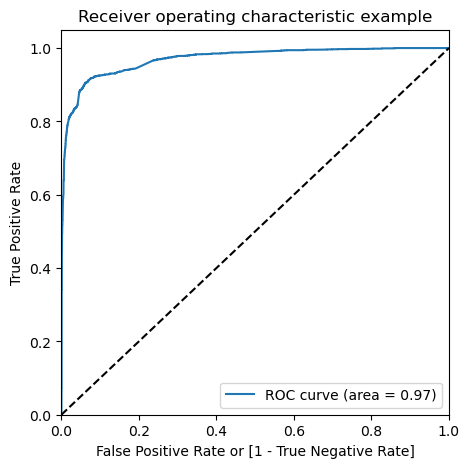

In [622]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

In [623]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.445825,7962,0,1,1,1,1,1,0,0,0,0,0
1,0,0.079345,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.023278,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.991806,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014834,9170,0,1,0,0,0,0,0,0,0,0,0


In [624]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.817954  0.974370  0.722236
0.2   0.2  0.900973  0.928069  0.884392
0.3   0.3  0.922630  0.914427  0.927650
0.4   0.4  0.924827  0.898305  0.941057
0.5   0.5  0.925769  0.881356  0.952947
0.6   0.6  0.915725  0.828855  0.968884
0.7   0.7  0.915725  0.811079  0.979762
0.8   0.8  0.905995  0.775527  0.985834
0.9   0.9  0.888575  0.721786  0.990640


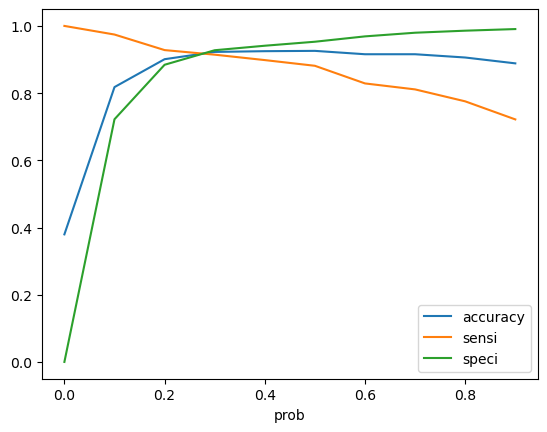

In [625]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [627]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.445825,7962,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.079345,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.023278,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.991806,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014834,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [629]:


y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.445825,7962,1,45
1,0,0.079345,5520,0,8
2,0,0.023278,1962,0,2
3,1,0.991806,1566,1,99
4,0,0.014834,9170,0,1


In [630]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9226302573760201

In [631]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3667,  286],
       [ 207, 2212]], dtype=int64)

In [632]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [633]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9144274493592394

In [634]:
# Let us calculate specificity
TN / float(TN+FP)

0.9276498861624083

In [ ]:
Observation:
So as we can see above the model seems to be performing well. 
The ROC curve has a value of 0.97, which is very good.
We have the following values for the Train Data:

Accuracy : 92.26%
Sensitivity : 91.4%
Specificity : 92.76%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [635]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0723501138375917


In [636]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8855084067253803


In [637]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9465668559628291


In [638]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3667,  286],
       [ 207, 2212]], dtype=int64)

In [639]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8855084067253803

In [640]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9144274493592394

In [641]:
from sklearn.metrics import precision_score, recall_score

In [642]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8855084067253803

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [643]:
from sklearn.metrics import precision_recall_curve

In [645]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

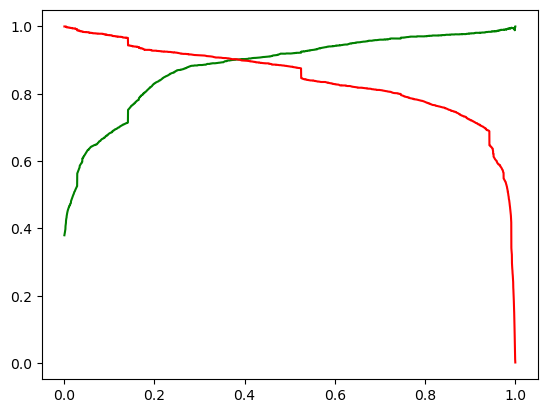

In [646]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [647]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.089406,-0.108519,0.308788,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4050,-0.788357,-0.888077,-1.133359,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7201,-0.322390,0.420993,-0.171928,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1196,0.143578,-0.110357,0.789504,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8219,0.842530,-0.433947,-0.292107,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [648]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.108519,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.888077,0,0,0,1,0,0,0,0,0,0,0,1
7201,0.420993,1,0,0,1,0,0,0,0,0,1,0,0
1196,-0.110357,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.433947,1,0,0,0,0,0,0,0,1,0,0,0


In [649]:
X_test_sm = sm.add_constant(X_test)

# Working on Test Data

In [650]:
y_test_pred = res.predict(X_test_sm)

In [653]:
y_test_pred[:10]

3504    0.007144
4050    0.990940
7201    0.131419
1196    0.007132
8219    0.986775
8747    0.140479
9048    0.651571
6524    0.003531
7693    0.057217
8187    0.033952
dtype: float64

In [654]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [655]:
# Let's see the head
y_pred_1.head()

,0
3504,0.007144
4050,0.990940
7201,0.131419
1196,0.007132
8219,0.986775


In [656]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [657]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [658]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [659]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [660]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.007144
1,1,4050,0.990940
2,0,7201,0.131419
3,0,1196,0.007132
4,1,8219,0.986775


In [661]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [662]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.007144
1,1,4050,0.990940
2,0,7201,0.131419
3,0,1196,0.007132
4,1,8219,0.986775


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [663]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.007144
1,1,4050,0.990940
2,0,7201,0.131419
3,0,1196,0.007132
4,1,8219,0.986775


In [664]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [665]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted
0,0,3504,0.007144,0
1,1,4050,0.990940,1
2,0,7201,0.131419,0
3,0,1196,0.007132,0
4,1,8219,0.986775,1


In [666]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9274990845844013

In [667]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1574,  115],
       [  83,  959]], dtype=int64)

In [668]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [669]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9203454894433781

In [670]:
# Let us calculate specificity
TN / float(TN+FP)

0.9319123741859088

In [671]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8929236499068901

In [673]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9203454894433781

# Final Result

Final values from train & Test:

Train Data: 
Accuracy : 92.66%
Sensitivity : 91.44%
Specificity : 92.76%
Test Data: 
Accuracy : 92.74%
Sensitivity : 92.03%
Specificity : 93.19%

In [ ]:
THANK YOU!